In [1]:
! pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline


Bad key savefig.frameon in file C:\Users\sator\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\sator\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\sator\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probab

In [3]:
combined_df = pd.read_csv('combined_binary_df.csv', index_col='date', infer_datetime_format=True, parse_dates=True)

In [4]:
combined_df.head()

,class,volume,google trend,Reddit positive,Reddit negative,Google positive,Google negative,reddit buzzword score,google buzzword score
date,,,,,,,,,
2017-08-18,1.0,1199.888264,1967,0.132,0.082,0.150,0.000,146.333495,9.736044
2017-08-19,0.0,381.309763,1844,0.122,0.090,0.059,0.027,187.989746,6.715108
2017-08-20,0.0,467.083022,1704,0.128,0.109,0.076,0.017,200.210838,7.921181
2017-08-21,1.0,691.743060,1702,0.129,0.104,0.111,0.076,162.376347,7.465451
2017-08-22,1.0,966.684858,1893,0.131,0.108,0.065,0.036,164.760500,8.167459


In [5]:
X = combined_df.drop(columns = 'class')
y = combined_df['class']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
# define model
model = xgb.XGBClassifier()

In [8]:
# set parameters to compare
search_params = {'eta': [0.01, 0.03, 0.05, 0.1, 0.3],
             'min_child_weight': [1, 2, 4, 6, 8, 16, 32],
             'max_depth': [4, 5, 6, 7, 8],
             'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5],
             'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1.0],
             'objective':['binary:logistic']   
             }

In [9]:
gsx = GridSearchCV(
    model,
    search_params,
    cv = 3,
    n_jobs = -1,
    verbose=True)

In [10]:
gsx.fit(X_train, y_train)

Fitting 3 folds for each of 6125 candidates, totalling 18375 fits
[20:20:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sator\anaconda3\envs\pyvizenv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             n_jobs=-1,
             param_grid={'colsam

In [11]:
gsx.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, eta=0.01, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=8,
              min_child_weight=16, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1.0, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [12]:
score = gsx.best_estimator_.score(X_test, y_test)
print("%0.2f accuracy" % (score))

0.49 accuracy


In [13]:
predicted = gsx.best_estimator_.predict(X_test)

In [14]:
classification_report(y_test, predicted)

'              precision    recall  f1-score   support\n\n         0.0       0.40      0.27      0.33       132\n         1.0       0.52      0.66      0.58       158\n\n    accuracy                           0.49       290\n   macro avg       0.46      0.47      0.46       290\nweighted avg       0.47      0.49      0.47       290\n'

In [15]:
sorted(zip(gsx.best_estimator_.feature_importances_, X.columns), reverse=True)

[(0.14136812, 'volume'),
 (0.13970453, 'google buzzword score'),
 (0.13766928, 'google trend'),
 (0.13188893, 'Google positive'),
 (0.12403023, 'Reddit negative'),
 (0.11797203, 'Google negative'),
 (0.1096372, 'reddit buzzword score'),
 (0.09772968, 'Reddit positive')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

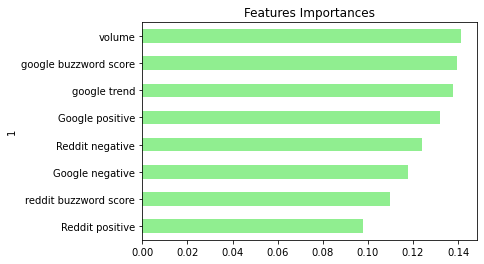

In [16]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(gsx.best_estimator_.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)